importing Jupyter notebook from Probability.ipynb


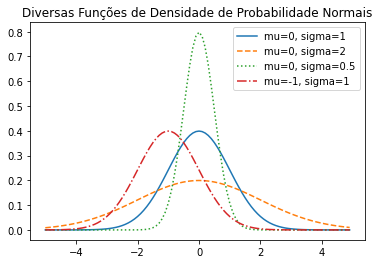

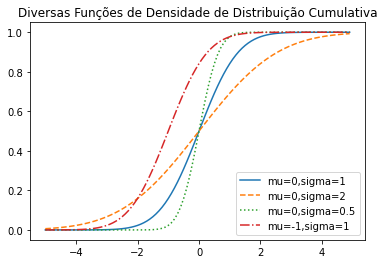

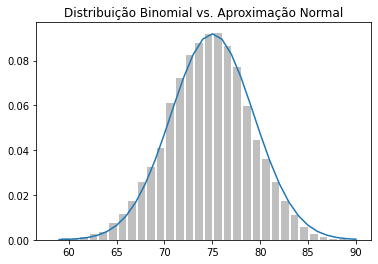

In [1]:
import import_ipynb # importar ele aqui
from Probability import normal_cdf, inverse_normal_cdf
import math, random

In [2]:
def normal_approximation_to_binomial(n,p):
    '''Encontra mu e sigma, correspondendo ao Binomial(n,p)'''
    
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

In [3]:
#####
#
# Probabilites a normal lies in an interval
#
#####

In [4]:
# O cdf normal é a probabilidade que a variavel esteja abaixo de um limite
normal_probability_below = normal_cdf

In [5]:
# Está acima do limite se não estiver abaixo
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

In [6]:
# Está entre se for menos do que hi, mas não menor do que lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

In [7]:
# Está fora se não estiver entre
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [8]:
#####
#
# Normal bounds
#
#####

In [9]:
def normal_upper_bound(probability, mu=0, sigma=1):
    '''Retorna z para que p(Z <= z) = probability'''
    
    return inverse_normal_cdf(probability, mu, sigma)

In [10]:
def normal_lower_bound(probability, mu=0, sigma=1):
    '''Retorna z para que p(Z >= z) = probability'''
    
    return inverse_normal_cdf(1 - probability, mu, sigma)

In [11]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    '''Retorna os limites simétricos (sobre a média)
    que contém a probabilidade especifica'''
    
    tail_probability = (1 - probability) / 2
    
    # Limite superior deveria ter tail_probability acima
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    
    # Limite inferior deveria ter tail_probability abaixo
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    
    return lower_bound, upper_bound

In [12]:
#####
#
# P-values
#
#####

In [13]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x > mu:
        # Se x for maior do que a média, a coroa será o que for maior do que x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # Se x for menor do que a média, a coroa será o que for menor do que x
        return 2 * normal_probability_below(x, mu, sigma)

In [14]:
def count_extreme_values():
    extreme_value_count = 0
    for _ in range(100000):
        num_heads = sum(1 if random.random() < 0.5 else 0  # contagem de # de caras
                        for _ in range(1000))              # em 1000 lançamentos
        if num_heads >= 530 or num_heads <= 470:           # e contagem da frequencia 
            extreme_value_count += 1                       # que # é 'extrema'
            
    return extreme_value_count / 100000 #0.062

In [15]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_below

In [16]:
#####
#
# P-Hacking
#
#####

In [17]:
def run_experiment():
    '''Lança uma moeda 1000 vezes, True = cara, False = coroa'''
    return [random.random() < 0.5 for _ in range(1000)]

In [18]:
def reject_fairness(experiment):
    '''Usando 5% dos níveis de significancia'''
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [19]:
#####
#
# Running an A/B test
#
#####

In [20]:
def estimated_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

In [21]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [22]:
#####
#
# Bayesian Inference
#
#####

In [23]:
def B(alpha, beta):
    '''Uma constante normalizada para que a probabilidade total seja 1'''
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

In [24]:
def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

In [25]:
if __name__ == "__main__":
    # Lançar uma moeda 1000 vezes com 50% de chance de cair cara ou coroa
    mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

    print(f'mu_0: {mu_0}')
    print(f'sigma_0: {sigma_0}')
    print(f'normal_two_sided_bounds(0.95, mu_0, sigma_0): {normal_two_sided_bounds(0.95, mu_0, sigma_0)}')  # (469,531)

    print()

    print('power of a test')

    print('--------------------------------')

    print('95% bounds based on assumption p is 0.5')
    lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
    print(f'lo: {lo}')
    print(f'hi: {hi}')

    print('--------------------------------')

    print('mu e sigma reais baseados em p = 0,55')
    mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
    print(f'mu_1: {mu_1}')
    print(f'sigma_1: {sigma_1}')

    print('--------------------------------')

    # Um erro tipo 2 significa que falhamos ao rejeitar a hipótese nula
    # que acontecerá quando X ainda estiver em nosso intervalo original
    type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
    power = 1 - type_2_probability  # 0.887

    print(f'type 2 probability: {type_2_probability}')
    print(f'power: {power}')

    print('--------------------------------')

    print('one-sided test')
    hi = normal_upper_bound(0.95, mu_0, sigma_0)
    print(f'hi: {hi}')  # é 526 (< 531, já que precisamos de mais probabilidade na aba superior)
    type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
    power = 1 - type_2_probability  # 0.936
    print(f'type 2 probability: {type_2_probability}')
    print(f'power: {power}')

    print('--------------------------------')

    print(f'two_sided_p_value(529.5, mu_0, sigma_0): {two_sided_p_value(529.5, mu_0, sigma_0)}')  # 0.0620
    print(f'two_sided_p_value(531.5, mu_0, sigma_0): {two_sided_p_value(531.5, mu_0, sigma_0)}')  # 0.0463

    print('--------------------------------')

    print(f'upper_p_value(524.5, mu_0, sigma_0): {upper_p_value(524.5, mu_0, sigma_0)}')  # 0.0606
    print(f'upper_p_value(526.5, mu_0, sigma_0): {upper_p_value(526.5, mu_0, sigma_0)}')  # 0.0468

    print('--------------------------------')

    print('P-hacking')

    random.seed(0)
    experiments = [run_experiment() for _ in range(1000)]
    num_rejections = len([experiments
                          for experiment in experiments
                          if reject_fairness(experiment)])

    print(f'{num_rejections} rejections out of 1000')  # 46

    print('--------------------------------')

    print('A/B testing')
    # 200 clicks a 1000 visualizações // 180 clicks a 1000 visualizações
    z = a_b_test_statistic(1000, 200, 1000, 180)
    print(f'a_b_test_statistic(1000,200,1000,180): {z}')  # -1.14
    print(f'p-value: {two_sided_p_value(z)}')  # 0.254
    print()

    # Probabilidade de apenas 0,0003% de ver tal diferença
    z1 = a_b_test_statistic(1000, 200, 1000, 150)
    print(f'a_b_test_statistic(1000,200,1000,150): {z1}')  # -2.94
    print(f'p-value: {two_sided_p_value(z1)}')  # 0.003

    print('--------------------------------')

mu_0: 500.0
sigma_0: 15.811388300841896
normal_two_sided_bounds(0.95, mu_0, sigma_0): (469.01026640487555, 530.9897335951244)

power of a test
--------------------------------
95% bounds based on assumption p is 0.5
lo: 469.01026640487555
hi: 530.9897335951244
--------------------------------
mu e sigma reais baseados em p = 0,55
mu_1: 550.0
sigma_1: 15.732132722552274
--------------------------------
type 2 probability: 0.1134519987046329
power: 0.886548001295367
--------------------------------
one-sided test
hi: 526.0073585242053
type 2 probability: 0.06362051966928273
power: 0.9363794803307173
--------------------------------
two_sided_p_value(529.5, mu_0, sigma_0): 0.06207721579598835
two_sided_p_value(531.5, mu_0, sigma_0): 0.046345287837786575
--------------------------------
upper_p_value(524.5, mu_0, sigma_0): 0.06062885772582072
upper_p_value(526.5, mu_0, sigma_0): 0.04686839508859242
--------------------------------
P-hacking
46 rejections out of 1000
-----------------------